In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

pd.set_option('max_columns', 30)
pd.set_option('max_rows', 20)

# Pandas Data Structures
## Series
A **Series** is a single vector of data (like a NumPy array) with an *index* that labels each element in the vector.

Series：一维数组，与Numpy中的一维array类似。二者与Python基本的数据结构List也很相近，其区别是：List中的元素可以是不同的数据类型，而Array和Series中则只允许存储相同的数据类型，这样可以更有效的使用内存，提高运算效率。

In [2]:
counts = pd.Series([14, 14, 41234, 234, 3456, 902, np.nan])
counts

0       14.0
1       14.0
2    41234.0
3      234.0
4     3456.0
5      902.0
6        NaN
dtype: float64

In [3]:
counts.values

array([  1.40000000e+01,   1.40000000e+01,   4.12340000e+04,
         2.34000000e+02,   3.45600000e+03,   9.02000000e+02,
                    nan])

如果创建 Series 时 index 未指定，则默认采用 Interger 类型的 index

In [4]:
counts.index

RangeIndex(start=0, stop=7, step=1)

创建 Series 时 index 可以指定特定 meaningful labels 作为 index:

In [5]:
bacteria = pd.Series(data=[632, 1638, 569, 115],
                     index=['Firmicutes', 'Proteobacteria', 'Actinobacteria', 'Bacteroidetes'])
bacteria

Firmicutes         632
Proteobacteria    1638
Actinobacteria     569
Bacteroidetes      115
dtype: int64

可以根据 index 获取 Series 的 value

In [6]:
print counts[0], ', ', bacteria['Firmicutes']

14.0 ,  632


In [7]:
[name.endswith('bacteria') for name in bacteria.index]

[False, True, True, False]

In [8]:
bacteria[[name.endswith('bacteria') for name in bacteria.index]]

Proteobacteria    1638
Actinobacteria     569
dtype: int64

虽然指定了特定 label 的 index，但还可以通过 interger 类型的下标访问

In [9]:
print bacteria[0], ', ', bacteria['Firmicutes']

632 ,  632


可以指定 Series 的 values 数组 和 index 所表示的含义

In [10]:
bacteria.name = "细菌数量"
bacteria.index.name = '细菌种类'
bacteria
# 或可以创建时指定 name
# s = pd.Series(np.random.randn(5), name='something')

细菌种类
Firmicutes         632
Proteobacteria    1638
Actinobacteria     569
Bacteroidetes      115
Name: 细菌数量, dtype: int64

可以对 Series 数据结构的 value 应用 numpy 的 math 函数，结果仍然为 Series

In [11]:
np.log(bacteria)

细菌种类
Firmicutes        6.448889
Proteobacteria    7.401231
Actinobacteria    6.343880
Bacteroidetes     4.744932
Name: 细菌数量, dtype: float64

可以对 Series 的 value 进行过滤

In [12]:
bacteria[bacteria.values > 100]

细菌种类
Firmicutes         632
Proteobacteria    1638
Actinobacteria     569
Bacteroidetes      115
Name: 细菌数量, dtype: int64

Series 类似与 ndarray， 可以进行分片等操作

In [13]:
print bacteria[-1]
print '---------------------------'
print bacteria[:3]
print '---------------------------'
print bacteria[bacteria > bacteria.median()]

115
---------------------------
细菌种类
Firmicutes         632
Proteobacteria    1638
Actinobacteria     569
Name: 细菌数量, dtype: int64
---------------------------
细菌种类
Firmicutes         632
Proteobacteria    1638
Name: 细菌数量, dtype: int64


Series 可以看出一个存储 key-value 的数据结构，我们可以从一个 python 的 dict 创建一个 Series，且创建的 Series 会按照键值排序

In [14]:
bacteria_dict = {'Firmicutes': 632, 'Proteobacteria': 1638, 'Actinobacteria': 569, 'Bacteroidetes': 115}
pd.Series(bacteria_dict)

Actinobacteria     569
Bacteroidetes      115
Firmicutes         632
Proteobacteria    1638
dtype: int64

可以对传入的 dict 作筛选，对于未包含的 key， 其值为 NaN

In [15]:
bacteria1 = pd.Series(bacteria_dict, index=['Firmicutes','Proteobacteria','Actinobacteria'])
bacteria1

Firmicutes         632
Proteobacteria    1638
Actinobacteria     569
dtype: int64

In [16]:
bacteria2 = pd.Series(bacteria_dict, index=['otherkey', 'Firmicutes','Proteobacteria','Actinobacteria'])
bacteria2

otherkey             NaN
Firmicutes         632.0
Proteobacteria    1638.0
Actinobacteria     569.0
dtype: float64

In [17]:
bacteria2.isnull()

otherkey           True
Firmicutes        False
Proteobacteria    False
Actinobacteria    False
dtype: bool

当用于与其他系列对象的操作时，标签用于**对齐数据**，如进行相同标签数据求和。

In [18]:
bacteria1 + bacteria2

Actinobacteria    1138.0
Firmicutes        1264.0
Proteobacteria    3276.0
otherkey             NaN
dtype: float64

## DataFrame
DataFrame 是一个二维标记的数据结构，可以包含不同类型的列，类似与一个表格、SQL表或是一个 Series 类型的 dict，是 pandas 中最常用的数据结构。

In [19]:
# 每列要包含相同长度的 array ： arrays must all be same length
data = pd.DataFrame({'value':[632, 1638, 569, 115, 433, 1130, 754, 555],
                     'patient':[1, 1, 1, 1, 2, 2, 2, 2],
                     'phylum':['Firmicutes', 'Proteobacteria', 'Actinobacteria', 
    'Bacteroidetes', 'Firmicutes', 'Proteobacteria', 'Actinobacteria', 'Bacteroidetes']})
data

,patient,phylum,value
0,1,Firmicutes,632
1,1,Proteobacteria,1638
2,1,Actinobacteria,569
3,1,Bacteroidetes,115
4,2,Firmicutes,433
5,2,Proteobacteria,1130
6,2,Actinobacteria,754
7,2,Bacteroidetes,555


创建的 DataFrame 默认通过 column 排序，可以通过指定 index 显示的顺序：

In [20]:
data[['value','phylum','patient']]

,value,phylum,patient
0,632,Firmicutes,1
1,1638,Proteobacteria,1
2,569,Actinobacteria,1
3,115,Bacteroidetes,1
4,433,Firmicutes,2
5,1130,Proteobacteria,2
6,754,Actinobacteria,2
7,555,Bacteroidetes,2


In [21]:
data.columns

Index([u'patient', u'phylum', u'value'], dtype='object')

In [22]:
data[data.columns]

,patient,phylum,value
0,1,Firmicutes,632
1,1,Proteobacteria,1638
2,1,Actinobacteria,569
3,1,Bacteroidetes,115
4,2,Firmicutes,433
5,2,Proteobacteria,1130
6,2,Actinobacteria,754
7,2,Bacteroidetes,555


可以通过 `data.column` 或 `data['column']` 获取指定列的数据

In [23]:
print data.phylum
print '-----------------------'
print data['phylum']
print type(data.phylum)

0        Firmicutes
1    Proteobacteria
2    Actinobacteria
3     Bacteroidetes
4        Firmicutes
5    Proteobacteria
6    Actinobacteria
7     Bacteroidetes
Name: phylum, dtype: object
-----------------------
0        Firmicutes
1    Proteobacteria
2    Actinobacteria
3     Bacteroidetes
4        Firmicutes
5    Proteobacteria
6    Actinobacteria
7     Bacteroidetes
Name: phylum, dtype: object
<class 'pandas.core.series.Series'>


In [24]:
data

,patient,phylum,value
0,1,Firmicutes,632
1,1,Proteobacteria,1638
2,1,Actinobacteria,569
3,1,Bacteroidetes,115
4,2,Firmicutes,433
5,2,Proteobacteria,1130
6,2,Actinobacteria,754
7,2,Bacteroidetes,555


可以通过 DataFrame 的 **ix** 属性获取每一行的数据，且支持分片操作：

In [25]:
print data.ix[0]
print '---------------------------------'
print data.ix[2:5]

patient             1
phylum     Firmicutes
value             632
Name: 0, dtype: object
---------------------------------
   patient          phylum  value
2        1  Actinobacteria    569
3        1   Bacteroidetes    115
4        2      Firmicutes    433
5        2  Proteobacteria   1130


可通过一个 dict of ditcs 创建一个复杂结构的 DataFrame

In [26]:
data = pd.DataFrame({'0': {'patient': 1, 'phylum': 'Firmicutes', 'counts': 632},
                     '1': {'patient': 1, 'phylum': 'Proteobacteria', 'counts': 1638},
                     '2': {'patient': 1, 'phylum': 'Actinobacteria', 'counts': 569},
                     '3': {'patient': 1, 'phylum': 'Bacteroidetes', 'counts': 115},
                     '4': {'patient': 2, 'phylum': 'Firmicutes', 'counts': 433},
                     '5': {'patient': 2, 'phylum': 'Proteobacteria', 'counts': 1130},
                     '6': {'patient': 2, 'phylum': 'Actinobacteria', 'counts': 754},
                     '7': {'patient': 2, 'phylum': 'Bacteroidetes', 'counts': 555}})
data

,0,1,2,3,4,5,6,7
counts,632,1638,569,115,433,1130,754,555
patient,1,1,1,1,2,2,2,2
phylum,Firmicutes,Proteobacteria,Actinobacteria,Bacteroidetes,Firmicutes,Proteobacteria,Actinobacteria,Bacteroidetes


In [27]:
data = data.T
data

,counts,patient,phylum
0,632,1,Firmicutes
1,1638,1,Proteobacteria
2,569,1,Actinobacteria
3,115,1,Bacteroidetes
4,433,2,Firmicutes
5,1130,2,Proteobacteria
6,754,2,Actinobacteria
7,555,2,Bacteroidetes


In [28]:
vals = data['counts']
vals

0     632
1    1638
2     569
3     115
4     433
5    1130
6     754
7     555
Name: counts, dtype: object

In [29]:
# 会修改内存中的数据，同时修改原始的 DataFrame 的数据
vals[0] = 1000
print vals
print '------------------------------------------------------------------'
print data

0    1000
1    1638
2     569
3     115
4     433
5    1130
6     754
7     555
Name: counts, dtype: object
------------------------------------------------------------------
  counts patient          phylum
0   1000       1      Firmicutes
1   1638       1  Proteobacteria
2    569       1  Actinobacteria
3    115       1   Bacteroidetes
4    433       2      Firmicutes
5   1130       2  Proteobacteria
6    754       2  Actinobacteria
7    555       2   Bacteroidetes


In [30]:
# copy 之后在对其修改，由于是不同的内存空间，所以 DataFrame 不会被修改
vals = data.counts.copy()
vals[0] = -1
print vals
print '------------------------------------------------------------------'
print data

0      -1
1    1638
2     569
3     115
4     433
5    1130
6     754
7     555
Name: counts, dtype: object
------------------------------------------------------------------
  counts patient          phylum
0   1000       1      Firmicutes
1   1638       1  Proteobacteria
2    569       1  Actinobacteria
3    115       1   Bacteroidetes
4    433       2      Firmicutes
5   1130       2  Proteobacteria
6    754       2  Actinobacteria
7    555       2   Bacteroidetes


可以通过赋值的方式新增或修改一列数据。
注意**新增一列只能通过 data['new_column'] 的方式**，而不能通过 data.new_column

In [31]:
data['year'] = 2017
# 虽不会报错，但不能添加一列
data.month = 1
data

,counts,patient,phylum,year
0,1000,1,Firmicutes,2017
1,1638,1,Proteobacteria,2017
2,569,1,Actinobacteria,2017
3,115,1,Bacteroidetes,2017
4,433,2,Firmicutes,2017
5,1130,2,Proteobacteria,2017
6,754,2,Actinobacteria,2017
7,555,2,Bacteroidetes,2017


新增的一列可以是一个 Series

In [32]:
treatment = pd.Series([0]*4 + [1]*2)
treatment

0    0
1    0
2    0
3    0
4    1
5    1
dtype: int64

In [33]:
data['treatment'] = treatment
data

,counts,patient,phylum,year,treatment
0,1000,1,Firmicutes,2017,NaN
1,1638,1,Proteobacteria,2017,NaN
2,569,1,Actinobacteria,2017,NaN
3,115,1,Bacteroidetes,2017,NaN
4,433,2,Firmicutes,2017,NaN
5,1130,2,Proteobacteria,2017,NaN
6,754,2,Actinobacteria,2017,NaN
7,555,2,Bacteroidetes,2017,NaN


对于 python 的其他数据类型，添加列时，其长度需要匹配否则会报错

In [34]:
month = ['1', '2', '3', '4', '5', '6', '7', '8']
data['month'] = month

In [35]:
data

,counts,patient,phylum,year,treatment,month
0,1000,1,Firmicutes,2017,NaN,1
1,1638,1,Proteobacteria,2017,NaN,2
2,569,1,Actinobacteria,2017,NaN,3
3,115,1,Bacteroidetes,2017,NaN,4
4,433,2,Firmicutes,2017,NaN,5
5,1130,2,Proteobacteria,2017,NaN,6
6,754,2,Actinobacteria,2017,NaN,7
7,555,2,Bacteroidetes,2017,NaN,8


使用 `del` 输出 DataFrame 的某一列

In [36]:
del data['treatment']
data

,counts,patient,phylum,year,month
0,1000,1,Firmicutes,2017,1
1,1638,1,Proteobacteria,2017,2
2,569,1,Actinobacteria,2017,3
3,115,1,Bacteroidetes,2017,4
4,433,2,Firmicutes,2017,5
5,1130,2,Proteobacteria,2017,6
6,754,2,Actinobacteria,2017,7
7,555,2,Bacteroidetes,2017,8


可以通过 DataFrame.values 将一个 DataFrame 转化为一个 ndarray 数组:

In [37]:
data.values

array([[1000, 1, 'Firmicutes', 2017, '1'],
       [1638, 1, 'Proteobacteria', 2017, '2'],
       [569, 1, 'Actinobacteria', 2017, '3'],
       [115, 1, 'Bacteroidetes', 2017, '4'],
       [433, 2, 'Firmicutes', 2017, '5'],
       [1130, 2, 'Proteobacteria', 2017, '6'],
       [754, 2, 'Actinobacteria', 2017, '7'],
       [555, 2, 'Bacteroidetes', 2017, '8']], dtype=object)

# Importing data
## Read CSV file

In [38]:
cat data/microbiome.csv

cat: data/microbiome.csv: No such file or directory


table can be read into a DataFrame using read_csv:
```
pd.read_csv("data/microbiome.csv")
```

In [40]:
microbiome = pd.read_csv('../data/microbiome.csv')
microbiome

,Taxon,Patient,Tissue,Stool
0,Firmicutes,1,632,305
1,Firmicutes,2,136,4182
2,Firmicutes,3,1174,703
3,Firmicutes,4,408,3946
4,Firmicutes,5,831,8605
5,Firmicutes,6,693,50
6,Firmicutes,7,718,717
7,Firmicutes,8,173,33
8,Firmicutes,9,228,80
9,Firmicutes,10,162,3196


注意 `read_csv` 方法默认第一行为 header。读取 csv 文件时，可以指定参数，如：header，names，index_col。

In [42]:
# header=None 表示 csv 文件第一行不是 header 而是数据
microbiome1 = pd.read_csv('../data/microbiome.csv', header=None)
microbiome1

,0,1,2,3
0,Taxon,Patient,Tissue,Stool
1,Firmicutes,1,632,305
2,Firmicutes,2,136,4182
3,Firmicutes,3,1174,703
4,Firmicutes,4,408,3946
5,Firmicutes,5,831,8605
6,Firmicutes,6,693,50
7,Firmicutes,7,718,717
8,Firmicutes,8,173,33
9,Firmicutes,9,228,80


`read_csv` 是 `read_table` 的具体简化的函数, 因为 csv 是通用的格式。
注意 `read_table` 方法默认第一行也是 header

In [43]:
microbiome = pd.read_table(filepath_or_buffer='../data/microbiome.csv', delimiter=',', header=None)
# 取出前几行记录
microbiome.head()

,0,1,2,3
0,Taxon,Patient,Tissue,Stool
1,Firmicutes,1,632,305
2,Firmicutes,2,136,4182
3,Firmicutes,3,1174,703
4,Firmicutes,4,408,3946


可以通过 `skiprows` 指定读取 csv 文件时跳过哪些行。

In [44]:
microbiome = pd.read_csv('../data/microbiome.csv', delimiter=',', skiprows=[0, 1, 2])
microbiome.head()

,Firmicutes,3,1174,703
0,Firmicutes,4,408,3946
1,Firmicutes,5,831,8605
2,Firmicutes,6,693,50
3,Firmicutes,7,718,717
4,Firmicutes,8,173,33


相反，可以通过 nrows 指定从一个大 csv 文件中读取一定行数的数据（index 从0开始）。

In [45]:
microbiome = pd.read_csv('../data/microbiome.csv', delimiter=',', nrows=4)
microbiome

,Taxon,Patient,Tissue,Stool
0,Firmicutes,1,632,305
1,Firmicutes,2,136,4182
2,Firmicutes,3,1174,703
3,Firmicutes,4,408,3946


通过 chunk 进行数据的迭代，用于对大文件的懒加载迭代，而不是将整个文件读入内存。

In [46]:
data_chunk_readers = pd.read_csv("../data/microbiome.csv", chunksize=15)
print data_chunk_readers
print '---------------------------------------'
mean_tissue = [chunk for chunk in data_chunk_readers]
for chunk in mean_tissue:
    print chunk
    print '---------------------------------------'

---------------------------------------
         Taxon  Patient  Tissue  Stool
0   Firmicutes        1     632    305
1   Firmicutes        2     136   4182
2   Firmicutes        3    1174    703
3   Firmicutes        4     408   3946
4   Firmicutes        5     831   8605
5   Firmicutes        6     693     50
6   Firmicutes        7     718    717
7   Firmicutes        8     173     33
8   Firmicutes        9     228     80
9   Firmicutes       10     162   3196
10  Firmicutes       11     372     32
11  Firmicutes       12    4255   4361
12  Firmicutes       13     107   1667
13  Firmicutes       14      96    223
14  Firmicutes       15     281   2377
---------------------------------------
             Taxon  Patient  Tissue  Stool
15  Proteobacteria        1    1638   3886
16  Proteobacteria        2    2469   1821
17  Proteobacteria        3     839    661
18  Proteobacteria        4    4414     18
19  Proteobacteria        5   12044     83
20  Proteobacteria        6    2310   

实际中的数据往往时不完整的，可能会丢失部分数据，Pandas 会自动识别出丢失的数据，并标记为通用的符号如 NA、NULL。

In [47]:
pd.read_csv("../data/microbiome_missing.csv").head(20)

,Taxon,Patient,Tissue,Stool
0,Firmicutes,1,632,305.0
1,Firmicutes,2,136,4182.0
2,Firmicutes,3,NaN,703.0
3,Firmicutes,4,408,3946.0
4,Firmicutes,5,831,8605.0
5,Firmicutes,6,693,50.0
6,Firmicutes,7,718,717.0
7,Firmicutes,8,173,33.0
8,Firmicutes,9,228,NaN
9,Firmicutes,10,162,3196.0


Pandas recognized NA and an empty field as missing data.

In [48]:
pd.isnull(pd.read_csv("../data/microbiome_missing.csv").head(20))

,Taxon,Patient,Tissue,Stool
0,False,False,False,False
1,False,False,False,False
2,False,False,True,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,True
9,False,False,False,False


我们可以通过 na_values 指定何种类型的数据为异常数据，将其标记为缺失的数据。

In [49]:
pd.read_csv('../data/microbiome_missing.csv', na_values=['?', -99999]).head(20)

,Taxon,Patient,Tissue,Stool
0,Firmicutes,1,632.0,305.0
1,Firmicutes,2,136.0,4182.0
2,Firmicutes,3,NaN,703.0
3,Firmicutes,4,408.0,3946.0
4,Firmicutes,5,831.0,8605.0
5,Firmicutes,6,693.0,50.0
6,Firmicutes,7,718.0,717.0
7,Firmicutes,8,173.0,33.0
8,Firmicutes,9,228.0,NaN
9,Firmicutes,10,162.0,3196.0


## Read Microsoft Excel
需要安装 `xlrd` 和 `openpyxl`。

In [50]:
mb_file = pd.ExcelFile('../data/microbiome/MID1.xls')
mb_file

In [51]:
mb_sheet1 = mb_file.parse(sheetname='Sheet 1', header=None)
mb_sheet1

,0,1
0,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",7
1,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",2
2,"Archaea ""Crenarchaeota"" Thermoprotei Sulfoloba...",3
3,"Archaea ""Crenarchaeota"" Thermoprotei Thermopro...",3
4,"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Meth...",7
5,"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Meth...",1
6,"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Meth...",1
7,"Archaea ""Euryarchaeota"" Archaeoglobi Archaeogl...",1
8,"Archaea ""Euryarchaeota"" Archaeoglobi Archaeogl...",1
9,"Archaea ""Euryarchaeota"" Halobacteria Halobacte...",1


In [52]:
# 指定读取的 excel 列名
mb_sheet1.columns = ['Taxon', 'Count']
mb_sheet1.head(20)

,Taxon,Count
0,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",7
1,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",2
2,"Archaea ""Crenarchaeota"" Thermoprotei Sulfoloba...",3
3,"Archaea ""Crenarchaeota"" Thermoprotei Thermopro...",3
4,"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Meth...",7
5,"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Meth...",1
6,"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Meth...",1
7,"Archaea ""Euryarchaeota"" Archaeoglobi Archaeogl...",1
8,"Archaea ""Euryarchaeota"" Archaeoglobi Archaeogl...",1
9,"Archaea ""Euryarchaeota"" Halobacteria Halobacte...",1


Pandas 提供了一个方便的方法用于读取 excel 文件`read_excel`，将上述操作进行了整合。

In [53]:
mb1_sheet1 = pd.read_excel('../data/microbiome/MID2.xls', sheetname='Sheet 1', header=None)
mb1_sheet1.columns = ['Taxon', 'Count']
mb1_sheet1.head()

,Taxon,Count
0,"Archaea ""Crenarchaeota"" Thermoprotei Acidiloba...",2
1,"Archaea ""Crenarchaeota"" Thermoprotei Acidiloba...",14
2,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",23
3,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",1
4,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",2


In [54]:
print mb1_sheet1.ix[0, 'Taxon']
print mb1_sheet1.ix[0, 'Count']
print mb1_sheet1.ix[0]['Count']
print '------------------------'
print mb1_sheet1.ix[1:2]['Count']

Archaea "Crenarchaeota" Thermoprotei Acidilobales Acidilobaceae Acidilobus
2
2
------------------------
1    14
2    23
Name: Count, dtype: int64


In [55]:
# 按照 Count 值降序排列
mb1_sheet1.Count.sort_values(ascending=False)

110    6176
122    4655
109    1377
257    1006
180     591
111     519
128     379
121     227
106     100
250      59
       ... 
81        1
82        1
83        1
202       1
201       1
200       1
198       1
88        1
89        1
143       1
Name: Count, dtype: int64

In [56]:
# sort_index(axis=1) 的 axis 指定了按照列/行进行排序(默认升序排列)
mb1_sheet1.sort_index(axis=1, ascending=False)

,Taxon,Count
0,"Archaea ""Crenarchaeota"" Thermoprotei Acidiloba...",2
1,"Archaea ""Crenarchaeota"" Thermoprotei Acidiloba...",14
2,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",23
3,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",1
4,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",2
5,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",1
6,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",2
7,"Archaea ""Crenarchaeota"" Thermoprotei Sulfoloba...",10
8,"Archaea ""Crenarchaeota"" Thermoprotei Sulfoloba...",11
9,"Archaea ""Crenarchaeota"" Thermoprotei Thermopro...",9


In [57]:
mb1_sheet1.sort_index(axis=0)

,Taxon,Count
0,"Archaea ""Crenarchaeota"" Thermoprotei Acidiloba...",2
1,"Archaea ""Crenarchaeota"" Thermoprotei Acidiloba...",14
2,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",23
3,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",1
4,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",2
5,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",1
6,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",2
7,"Archaea ""Crenarchaeota"" Thermoprotei Sulfoloba...",10
8,"Archaea ""Crenarchaeota"" Thermoprotei Sulfoloba...",11
9,"Archaea ""Crenarchaeota"" Thermoprotei Thermopro...",9


## Missing data
在Series 和 DataFrame 中，确实的数据用浮点类型的 NaN 表示。

In [58]:
foo = pd.Series([np.nan, -3, None, 'foobar', -3])
foo

0       NaN
1        -3
2      None
3    foobar
4        -3
dtype: object

In [59]:
foo.isnull()

0     True
1    False
2     True
3    False
4    False
dtype: bool

In [60]:
# 去除确实的数据，注意 foo 的元素并没有改变
print foo.dropna()
print '-----------------'
print foo

1        -3
3    foobar
4        -3
dtype: object
-----------------
0       NaN
1        -3
2      None
3    foobar
4        -3
dtype: object


In [61]:
foo[foo.notnull()]

1        -3
3    foobar
4        -3
dtype: object

In [62]:
# 去除重复数据
foo.drop_duplicates()

0       NaN
1        -3
2      None
3    foobar
dtype: object

In [63]:
foo

0       NaN
1        -3
2      None
3    foobar
4        -3
dtype: object

In [64]:
# 对于缺失的数据填充默认的值
foo.fillna(-1)

0        -1
1        -3
2        -1
3    foobar
4        -3
dtype: object

In [65]:
data = pd.DataFrame({'0': {'patient': 1, 'phylum': 'Firmicutes', 'counts': 632},
                     '1': {'patient': 1, 'phylum': 'Proteobacteria', 'counts': 1638},
                     '2': {'patient': 1, 'phylum': 'Actinobacteria', 'counts': 569},
                     '3': {'patient': None, 'phylum': 'Bacteroidetes', 'counts': 115},
                     '4': {'patient': 2, 'phylum': 'Firmicutes', 'counts': 433},
                     '5': {'patient': 2, 'phylum': 'Proteobacteria', 'counts': 1130},
                     '6': {'patient': 2, 'phylum': 'Actinobacteria', 'counts': 754},
                     '7': {'patient': 2, 'phylum': 'Bacteroidetes', 'counts': np.nan}})
data = data.T
data

,counts,patient,phylum
0,632,1,Firmicutes
1,1638,1,Proteobacteria
2,569,1,Actinobacteria
3,115,None,Bacteroidetes
4,433,2,Firmicutes
5,1130,2,Proteobacteria
6,754,2,Actinobacteria
7,NaN,2,Bacteroidetes


In [66]:
# data 的内容不会修改，可采用赋值的方式进行修改
data = data.fillna({'patient': -1, 'counts': 0})
data

,counts,patient,phylum
0,632,1,Firmicutes
1,1638,1,Proteobacteria
2,569,1,Actinobacteria
3,115,-1,Bacteroidetes
4,433,2,Firmicutes
5,1130,2,Proteobacteria
6,754,2,Actinobacteria
7,0,2,Bacteroidetes


## Data summarization

In [67]:
# 数值类型进行求和，字符串类型的进行拼接
data.sum()

counts                                                  5271
patient                                                   10
phylum     FirmicutesProteobacteriaActinobacteriaBacteroi...
dtype: object

In [68]:
# 只计算出数值类型的列
bacteria2.mean()

946.33333333333337

In [69]:
# 默认跳过 NaN 类型的数据
bacteria2.mean(skipna=False)

nan

In [70]:
# describe 用于对 Series 和 DataFrame 多个统计信息作快照
data.describe()

,counts,patient
count,8.000000,8.000000
mean,658.875000,1.250000
std,531.766446,1.035098
min,0.000000,-1.000000
25%,353.500000,1.000000
50%,600.500000,1.500000
75%,848.000000,2.000000
max,1638.000000,2.000000


In [71]:
# 可以对 DataFrame 的某一列进行统计
data.counts.describe()

count       8.000000
mean      658.875000
std       531.766446
min         0.000000
25%       353.500000
50%       600.500000
75%       848.000000
max      1638.000000
Name: counts, dtype: float64

## Writing Data to Files

In [72]:
# to_csv 将 DataFrame 保存到 csv 文件中，默认（，）分割，可通过 sep 指定分隔符
bacteria2.to_csv('mb.csv', sep='\t')

In [73]:
# 更有效的保存数据的方法是将 DataFrame 数据保存为二进制的形式，支持 python built-in pickle 序列化
data.to_pickle('data_pickle')

In [74]:
data

,counts,patient,phylum
0,632,1,Firmicutes
1,1638,1,Proteobacteria
2,569,1,Actinobacteria
3,115,-1,Bacteroidetes
4,433,2,Firmicutes
5,1130,2,Proteobacteria
6,754,2,Actinobacteria
7,0,2,Bacteroidetes


In [75]:
pd.read_pickle('data_pickle')

,counts,patient,phylum
0,632,1,Firmicutes
1,1638,1,Proteobacteria
2,569,1,Actinobacteria
3,115,-1,Bacteroidetes
4,433,2,Firmicutes
5,1130,2,Proteobacteria
6,754,2,Actinobacteria
7,0,2,Bacteroidetes


## Date/Time data handling
处理 Date/Time 类型的数据。

In [1]:
from datetime import datetime

In [2]:
now = datetime.now()
now

datetime.datetime(2017, 1, 12, 10, 33, 41, 538564)

In [3]:
print now.year
print now.day
print now.weekday()

2017
12
3


In [4]:
from datetime import date, time
time(3, 24)

datetime.time(3, 24)

In [5]:
date(1970, 9, 3)

datetime.date(1970, 9, 3)

In [6]:
my_age = now - datetime(1992, 10, 1)
my_age

datetime.timedelta(8869, 38021, 538564)

In [7]:
my_age.days / 365

24

In [9]:
segments = pd.read_csv("../data/AIS/transit_segments.csv")
segments.head()

,mmsi,name,transit,segment,seg_length,avg_sog,min_sog,max_sog,pdgt10,st_time,end_time
0,1,Us Govt Ves,1,1,5.1,13.2,9.2,14.5,96.5,2/10/09 16:03,2/10/09 16:27
1,1,Dredge Capt Frank,1,1,13.5,18.6,10.4,20.6,100.0,4/6/09 14:31,4/6/09 15:20
2,1,Us Gov Vessel,1,1,4.3,16.2,10.3,20.5,100.0,4/6/09 14:36,4/6/09 14:55
3,1,Us Gov Vessel,2,1,9.2,15.4,14.5,16.1,100.0,4/10/09 17:58,4/10/09 18:34
4,1,Dredge Capt Frank,2,1,9.2,15.4,14.6,16.2,100.0,4/10/09 17:59,4/10/09 18:35


(262526, 11)


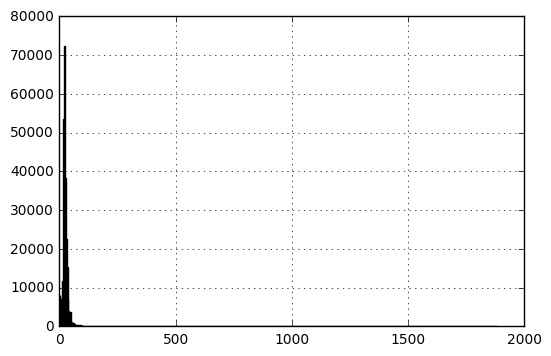

In [10]:
print segments.shape
# 绘制 seg_length（Series） 列数据的分布情况，Draw histogram of the input series using matplotlib
# bins 指定直方图的分组
segments.seg_length.hist(bins=500)

In [11]:
seg_length = segments.seg_length
seg_length.value_counts()

19.9     3272
19.8     3217
20.0     3167
19.7     3045
20.1     2944
19.6     2907
19.5     2839
20.2     2780
20.3     2615
19.4     2533
         ... 
166.8       1
648.0       1
207.5       1
244.7       1
323.5       1
533.3       1
161.5       1
122.9       1
216.6       1
569.2       1
Name: seg_length, dtype: int64

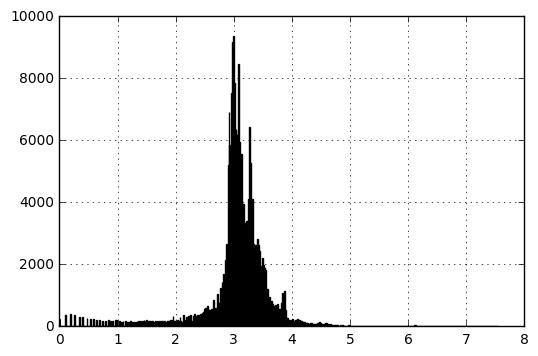

In [12]:
seg_length.apply(np.log).hist(bins=500)

In [13]:
datetime.strptime(segments.st_time.ix[0], '%m/%d/%y %H:%M')

datetime.datetime(2009, 2, 10, 16, 3)

In [14]:
# dateutil 用于自动检测时间格式并将其转换
from dateutil.parser import parse
parse(segments.st_time.ix[0])

datetime.datetime(2009, 2, 10, 16, 3)

In [15]:
segments.st_time.apply(lambda date_parse: datetime.strptime(date_parse, '%m/%d/%y %H:%M'))

0        2009-02-10 16:03:00
1        2009-04-06 14:31:00
2        2009-04-06 14:36:00
3        2009-04-10 17:58:00
4        2009-04-10 17:59:00
5        2010-03-20 16:06:00
6        2010-03-20 18:05:00
7        2011-05-04 11:28:00
8        2010-06-05 11:23:00
9        2010-06-08 11:03:00
                 ...        
262516   2010-06-05 05:25:00
262517   2010-06-27 02:35:00
262518   2010-07-01 03:49:00
262519   2010-07-02 03:30:00
262520   2010-06-13 10:32:00
262521   2010-06-15 12:49:00
262522   2010-06-15 21:32:00
262523   2010-06-17 19:16:00
262524   2010-06-18 02:52:00
262525   2010-06-18 10:19:00
Name: st_time, dtype: datetime64[ns]

In [17]:
# pandas 提供了一个便捷的函数用于 Series 数据的格式化为 datetime 类型
# 测试发现这个方法效率比 lamda 模式的要低很多？
pd.to_datetime(segments.st_time)

0        2009-02-10 16:03:00
1        2009-04-06 14:31:00
2        2009-04-06 14:36:00
3        2009-04-10 17:58:00
4        2009-04-10 17:59:00
5        2010-03-20 16:06:00
6        2010-03-20 18:05:00
7        2011-05-04 11:28:00
8        2010-06-05 11:23:00
9        2010-06-08 11:03:00
                 ...        
262516   2010-06-05 05:25:00
262517   2010-06-27 02:35:00
262518   2010-07-01 03:49:00
262519   2010-07-02 03:30:00
262520   2010-06-13 10:32:00
262521   2010-06-15 12:49:00
262522   2010-06-15 21:32:00
262523   2010-06-17 19:16:00
262524   2010-06-18 02:52:00
262525   2010-06-18 10:19:00
Name: st_time, dtype: datetime64[ns]